# Lecture 1

## Fundemantal problem of linear algebra
Solving a system of linear equations

## Simple case of linear equations
$n$ unknowns and $n$ equations (equal number of equations and unknowns)

### The system of linear equestions
$$
\begin{align}
    \begin{array}{lcl}
        2x - y & = & 0 \\
        -x + 2y & = & 3
    \end{array}
\end{align}
$$

### The matrix form of the linear equations
$$
\begin{align}

    \begin{bmatrix}
        2 & -1\\ -1 & 2
    \end{bmatrix}
    \begin{bmatrix}
        x \\ y
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 \\ 3
    \end{bmatrix}
\end{align}
$$

$$
    A\textbf{x} = \textbf{b}
$$

### The row picture

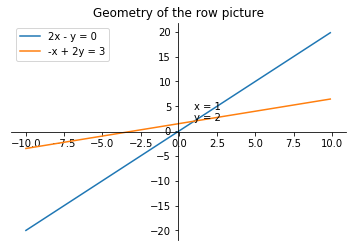

In [55]:
# The geometry the row picture of the example system of linear equations

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from lib.plot import init_fig_with_coord

y_func_1 = lambda x: 2 * x  # First row
y_func_2 = lambda x: (3 + x) / 2  # Second row

x = np.arange(-10., 10., 0.1)

y_1 = y_func_1(x)
y_2 = y_func_2(x)

init_fig_with_coord()

plt.title('Geometry of the row picture')

line_1, = plt.plot(x, y_1, label='2x - y = 0')
line_2, = plt.plot(x, y_2, label='-x + 2y = 3')
plt.legend(handles=[line_1, line_2])
plt.annotate('x = 1\ny = 2', xy=(1, 2))

plt.show()

### The column picture

$$
    x
    \begin{bmatrix}
        2 \\ -1
    \end{bmatrix}
    +
    y
    \begin{bmatrix}
        -1 \\ 2
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 \\ 3
    \end{bmatrix}
$$

...which is a linear combination

The solution for above is 
$$ 
    1
    \begin{bmatrix}
        2 \\ -1
    \end{bmatrix}
    +
    2
    \begin{bmatrix}
        -1 \\ 2
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 \\ 3
    \end{bmatrix}
$$

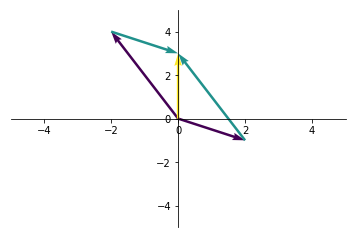

In [2]:
v_1 = (2, -1)
v_2 = (-1, 2)
solution_v = (1, 2)
sum_v = (solution_v[0] * v_1[0] + solution_v[1] * v_2[0], solution_v[0] * v_1[1] + solution_v[1] * v_2[1])

X = (0, 0, solution_v[0] * v_1[0], solution_v[1] * v_2[0], 0)
Y = (0, 0, solution_v[0] * v_1[1], solution_v[1] * v_2[1], 0)
U = (solution_v[0] * v_1[0], solution_v[1] * v_2[0], solution_v[1] * v_2[0], solution_v[0] * v_1[0], sum_v[0])
V = (solution_v[0] * v_1[1], solution_v[1] * v_2[1], solution_v[1] * v_2[1], solution_v[0] * v_1[1], sum_v[1])
C = (0, 0, 1, 1, 2)

ax = init_fig_with_coord()
ax.quiver(X, Y, U, V, C, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.show()

Quesitons: 
* What is the set of all linear combinations

$$
    x
    \begin{bmatrix}
        2 \\ -1
    \end{bmatrix}
    +
    y
    \begin{bmatrix}
        -1 \\ 2
    \end{bmatrix}
$$

for all $x$ and $y$? What is the gemotry representation of that?

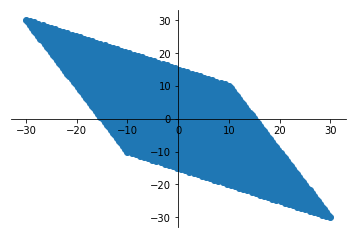

In [3]:
# Illustrate the gemotry of the linear combination for a range of x and y

v_1 = (2, -1)
v_2 = (-1, 2)

resolution = 50
linspace = np.linspace(-10, 10, resolution)
points = [(np.add(np.multiply(x, v_1), np.multiply(y, v_2))) for x in linspace for y in linspace]

xs = [point[0] for point in points]
ys = [point[1] for point in points]

ax = init_fig_with_coord()
plt.scatter(xs, ys)

* What if there are more unknowns?

$$
    \begin{array}{lcl}
        2x - y & = & 0 \\ 
        -x + 2y - z & = & 1 \\
        -3y + 4z & = & 4
    \end{array}
$$

The matrix form of above system of equations

$$
    \begin{bmatrix}
        2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -3 & 4
    \end{bmatrix}
    \begin{bmatrix}
        x \\ y \\ z
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 \\ 1 \\ 4
    \end{bmatrix}
$$

<IPython.core.display.Javascript object>


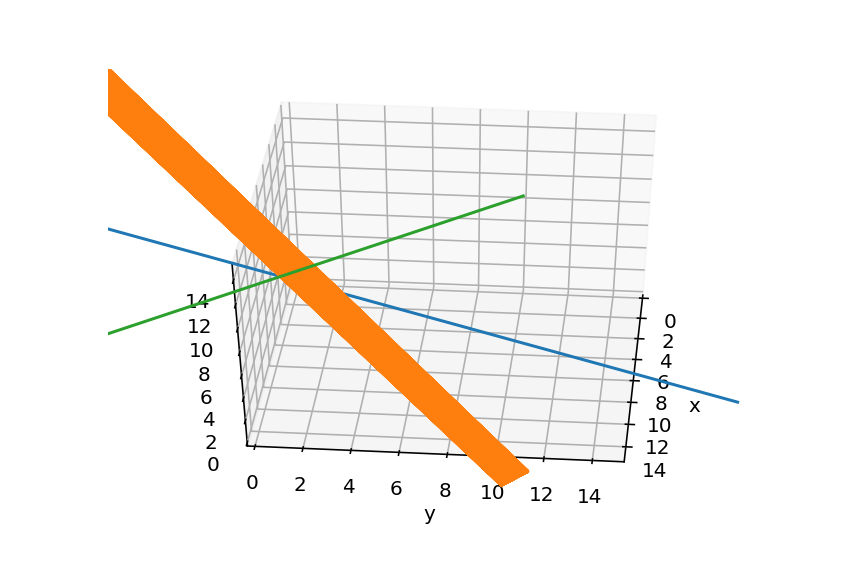

Text(0.5,0,'y')

In [61]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

_range = np.arange(-10., 10., 0.1)

# row_1 = [(x, 2 * x, 0) for x in _range]

row_2_zs = lambda x, y: 1 + x - 2 * y
row_2 = [(x, y, row_2_zs(x, y)) for x in _range for y in _range]

row_3 = [(0, y, 1 + (3 / 4.0) * y) for y in _range]

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot([point[0] for point in row_1], [point[1] for point in row_1], [point[2] for point in row_1])
ax.plot([point[0] for point in row_2], [point[1] for point in row_2], [point[2] for point in row_2])
ax.plot([point[0] for point in row_3], [point[1] for point in row_3], [point[2] for point in row_3])

ax.set_xlim([0, 15])
ax.set_ylim([0, 15])
ax.set_zlim([0, 15])
plt.xlabel('x')
plt.ylabel('y')